In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path
import scipy.io

In [2]:
sub_num = '1'
#os.path.abspath("../data/cwd/mydir/myfile.txt")
path = os.path.abspath("../data/01_raw/sub_")+sub_num

file_t = ['21-May-2020-19-41-37', '21-May-2020-20-01-58','21-May-2020-20-20-13']


In [3]:
imu_files = [path+'/imu/'+'imu-'+date for date in file_t]
emg_files =  [path+'/emg/'+'emg-'+date for date in file_t]
command_files =  [path+'/command/'+'command-'+date for date in file_t]

files = []
files.extend(imu_files)
files.extend(emg_files)
files.extend(command_files)

In [149]:
for file in files:
    
    data = scipy.io.loadmat(file+'.mat')
    
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt((file+".csv"),data[i],delimiter=',')

In [170]:
df = {}

for file in files:
    ix = files.index(file)
    df[ix] = (pd.read_csv(file+'.csv',header=None))
    

In [464]:
trial = {}
trial_df = {}
trial_nums = [1,2,3]

for trial_num in trial_nums:

    trial[trial_num-1] = pd.DataFrame({'idx':['imu','emg','command'], 'dfs':[df[trial_num-1], df[trial_num+2], df[trial_num+5]]})
    
    trial[trial_num-1].dfs.iloc[0].index = ['time','E1','E2','E3','S1','S2','S3','T1','T2','T3']
    trial[trial_num-1].dfs.iloc[1].index = ['time','BB','TB','AD','PM','ED']
    trial[trial_num-1].dfs.iloc[2].index = ['time','date','command','command_time','pressure']
    
    trial_comb = trial[trial_num-1].dfs.iloc[0]
    trial_comb = trial_comb.append(trial[trial_num-1].dfs.iloc[1].iloc[1:6])
    trial_comb = trial_comb.append(trial[trial_num-1].dfs.iloc[2].iloc[1:5])
    
    trial_df[trial_num-1] = trial_comb.T
     
    path = os.path.abspath(r"../data/02_processed/sub_")+sub_num+'/trial_'+str(trial_num)+'.csv'
    trial[trial_num-1].to_csv(path,index=False,header=True)
    
    path_2 = os.path.abspath(r"../data/02_processed/sub_")+sub_num+'/trial_'+str(trial_num)+'_combined.csv'
    trial_df[trial_num-1].to_csv(path_2,index=False,header=True)

In [299]:
trial_df[0]

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,date,command,command_time,pressure
0,0.000,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.003357,0.010681,0.010986,-0.007019,-0.006104,737932.820570,1.0,1.0,0.149689
1,0.006,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.000916,-0.037842,0.010071,-0.004578,-0.007935,NaN,NaN,NaN,NaN
2,0.012,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002441,-0.027466,0.008850,-0.004578,0.000000,737932.820570,1.0,0.0,0.119751
3,0.018,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.044250,0.007629,-0.005798,0.004272,737932.820570,1.0,0.0,0.119751
4,0.024,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.027466,0.007935,-0.005188,0.003662,737932.820570,1.0,0.0,0.089813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143751,862.506,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.003662,-0.008850,0.002747,0.001221,0.005188,737932.830552,0.0,0.0,0.089813
143752,862.512,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.006409,0.018005,0.006409,-0.005493,0.003357,737932.830552,0.0,0.0,0.119751
143753,862.518,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.000610,-0.019531,0.010986,-0.010071,-0.004272,737932.830552,0.0,0.0,0.029938
143754,862.524,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.005188,-0.028076,0.012512,-0.003357,0.002747,737932.830553,0.0,0.0,0.149689


In [300]:
trial_df[0].describe()

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,date,command,command_time,pressure
count,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143756.000000,143755.000000,143755.000000,143755.000000,143755.000000
mean,431.265000,59.287687,84.589684,13.318930,34.654953,-48.318796,31.244834,-10.919673,-4.178568,2.090613,0.003766,-0.007026,0.008399,-0.003577,-0.000448,737932.825561,2.337303,0.001976,0.227591
std,248.993562,18.364657,7.349321,12.708082,16.817193,25.453760,10.025141,5.961679,4.814507,1.951864,0.015231,0.013629,0.034977,0.003245,0.012862,0.002882,2.387860,0.044404,0.478394
min,0.000000,0.000000,0.140500,-16.709700,0.083511,-89.355800,2.499800,-22.547600,-30.679200,-14.561300,-0.166321,-0.094604,-0.407104,-0.025024,-0.223999,737932.820570,0.000000,0.000000,-0.479004
25%,215.632500,45.535200,80.539200,-0.116140,21.807200,-61.551600,23.601800,-14.071200,-6.443300,1.195800,0.000305,-0.013123,0.004883,-0.005493,-0.004883,737932.823065,0.000000,0.000000,0.059875
50%,431.265000,68.865700,87.447800,20.695300,25.311200,-54.886800,27.059400,-12.583000,-3.838500,1.887600,0.003662,-0.007019,0.008240,-0.003662,-0.000610,737932.825561,1.000000,0.000000,0.089813
75%,646.897500,72.010700,89.137525,23.747600,51.262000,-38.580375,38.297800,-11.254900,-1.142000,3.066500,0.006714,-0.000916,0.011292,-0.001831,0.003967,737932.828057,5.000000,0.000000,0.149689
max,862.530000,79.046200,99.743400,28.348200,74.486700,269.198800,60.620600,14.426100,10.947300,7.999500,0.248718,0.082092,0.469360,0.015564,0.221863,737932.830553,7.000000,1.000000,9.160950


In [303]:
trial_df[2].isnull().sum()

time            0
E1              0
E2              0
E3              0
S1              0
S2              0
S3              0
T1              0
T2              0
T3              0
BB              0
TB              0
AD              0
PM              0
ED              0
date            0
command         0
command_time    0
pressure        0
dtype: int64

In [ ]:
## TO DO
# Filter Angles
# Find velocity and acceleration
# Filter EMG: mean variance?
# Segment on command

In [320]:
def lowpass_filter(time, raw_signal, order=2, low_pass=10, sfreq=1000, show=0):
    
    from scipy import signal
    
    low_pass = low_pass/sfreq
    b, a = scipy.signal.butter(order, low_pass, btype='lowpass')
    filtered_signal = scipy.signal.filtfilt(b, a, raw_signal)#imu_rectified)
    
    if show ==1:
        plt.figure(1, figsize=(15,8))
        plt.subplot(2,5,1)
        plt.plot(time[0:10000],raw_signal[0:10000])
        plt.subplot(2,5,2)
        plt.plot(time[0:10000],filtered_signal[0:10000])
        plt.subplot(2,5,3)
        plt.plot(time[0:1000],raw_signal[0:1000])
        plt.subplot(2,5,4)
        plt.plot(time[0:1000],filtered_signal[0:1000])
        plt.subplot(2,5,5)
        plt.plot(time[0:1000],raw_signal[0:1000])
        plt.plot(time[0:1000],filtered_signal[0:1000],'r')
        plt.show()
    
    return filtered_signal

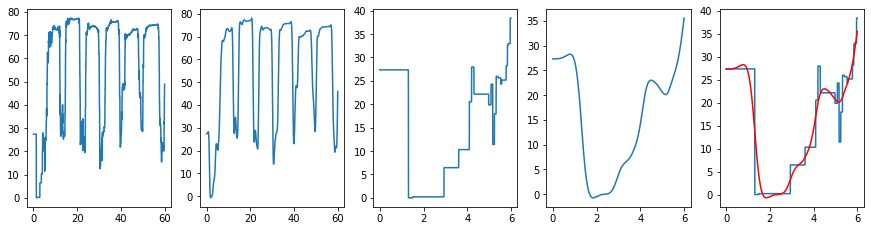

array([27.32275824, 27.32229792, 27.32186596, ..., 38.79655414,
       38.7964893 , 38.7964368 ])

In [490]:
lowpass_filter(trial_df[0].time,trial_df[0].E1,2,2,167,1)

In [347]:
def filter_emg(time, emg, low_pass=10, sfreq=1000, high_band=20, low_band=450, show=0):
    import scipy as sp
    import matplotlib.pyplot as plt
    
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    if show == 1:
    
        # plot graphs
        fig = plt.figure()
        
        ax1 = plt.subplot(1, 4, 1)
        ax1.set_title('Unfiltered,' + '\n' + 'unrectified EMG')
        ax1.plot(time, emg)
        ax1.locator_params(axis='x', nbins=4)
        ax1.locator_params(axis='y', nbins=4)
        plt.ylim(-0.1, 0.1)
        plt.xlim(0, 25)
        plt.xlabel('Time (sec)')
        plt.ylabel('EMG (a.u.)')
        
        ax2 = plt.subplot(1, 4, 2)
        ax2.set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
        ax2.plot(time, emg_rectified)
        ax2.locator_params(axis='x', nbins=4)
        ax2.locator_params(axis='y', nbins=4)
        plt.ylim(-0.1, 0.1)
        plt.xlim(0, 25)
        plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
        plt.xlabel('Time (sec)')
    
        ax3 = plt.subplot(1, 4, 3)
        ax3.set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
        ax3.plot(time, emg_envelope)
        ax3.locator_params(axis='x', nbins=4)
        ax3.locator_params(axis='y', nbins=4)
        plt.ylim(-0.1, 0.1)
        plt.xlim(0, 25)
        plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
        plt.xlabel('Time (sec)')
        
        ax4 = plt.subplot(1, 4, 4)
        ax4.set_title('Focussed region')
        ax4.plot(time[int(0.9*1000):int(1.0*1000)], emg_envelope[int(0.9*1000):int(1.0*1000)])
        ax4.locator_params(axis='x', nbins=4)
        ax4.locator_params(axis='y', nbins=4)
        #plt.xlim(0.9, 1.0)
        #plt.xlim(0, 25)
        plt.ylim(-0.1, 0.1)
        plt.xlabel('Time (sec)')
    
        fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
        fig.set_size_inches(w=11,h=7)
        fig.savefig(fig_name)
        
        plt.show()

 # show what different low pass filter cut-offs do
#    for i in [3, 10, 40]:
#            filteremg(time, emg, low_pass=i) #emg_correctmean
    return emg_envelope

In [446]:

trial_df[0].E1 = lowpass_filter(trial_df[0].time,trial_df[0].E1,2,2,167,0)
trial_df[0].E2 = lowpass_filter(trial_df[0].time,trial_df[0].E2,2,2,167,0)
trial_df[0].E3 = lowpass_filter(trial_df[0].time,trial_df[0].E3,2,2,167,0)
trial_df[0].S1 = lowpass_filter(trial_df[0].time,trial_df[0].S1,2,2,167,0)
trial_df[0].S2 = lowpass_filter(trial_df[0].time,trial_df[0].S2,2,2,167,0)
trial_df[0].S3 = lowpass_filter(trial_df[0].time,trial_df[0].S3,2,2,167,0)
trial_df[0].T1 = lowpass_filter(trial_df[0].time,trial_df[0].T1,2,2,167,0)
trial_df[0].T2 = lowpass_filter(trial_df[0].time,trial_df[0].T2,2,2,167,0)
trial_df[0].T3 = lowpass_filter(trial_df[0].time,trial_df[0].T3,2,2,167,0)

trial_df[0].BB = filter_emg(trial_df[0].time,trial_df[0].BB,low_pass=1, sfreq=167, high_band=1, low_band=83, show=0)
trial_df[0].TB = filter_emg(trial_df[0].time,trial_df[0].TB,low_pass=1, sfreq=167, high_band=1, low_band=83, show=0)
trial_df[0].AD = filter_emg(trial_df[0].time,trial_df[0].AD,low_pass=1, sfreq=167, high_band=1, low_band=83, show=0)
trial_df[0].PM = filter_emg(trial_df[0].time,trial_df[0].PM,low_pass=1, sfreq=167, high_band=1, low_band=83, show=0)
trial_df[0].ED = filter_emg(trial_df[0].time,trial_df[0].ED,low_pass=1, sfreq=167, high_band=1, low_band=83, show=0)
    

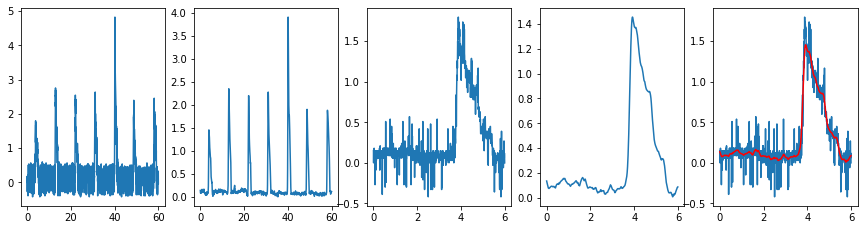

array([0.13563953, 0.13004248, 0.12524827, ..., 0.12795919, 0.12898838,
       0.13023175])

In [537]:
lowpass_filter(trial_df[0].time,trial_df[0].pressure.fillna(0),1,6,167,1)

In [501]:
trial_df[0].pressure.

0         0.149689
1              NaN
2         0.119751
3         0.119751
4         0.089813
            ...   
143751    0.089813
143752    0.119751
143753    0.029938
143754    0.149689
143755    0.119751
Name: pressure, Length: 143756, dtype: float64

In [503]:
trial_df[0].apply(lambda x: x.fillna(x.mean()),axis=1)

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,date,command,command_time,pressure
0,0.000,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.003357,0.010681,0.010986,-0.007019,-0.006104,737932.820570,1.000000,1.000000,0.149689
1,0.006,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.000916,-0.037842,0.010071,-0.004578,-0.007935,9.219069,9.219069,9.219069,9.219069
2,0.012,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002441,-0.027466,0.008850,-0.004578,0.000000,737932.820570,1.000000,0.000000,0.119751
3,0.018,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.044250,0.007629,-0.005798,0.004272,737932.820570,1.000000,0.000000,0.119751
4,0.024,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.027466,0.007935,-0.005188,0.003662,737932.820570,1.000000,0.000000,0.089813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143751,862.506,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.003662,-0.008850,0.002747,0.001221,0.005188,737932.830552,0.000000,0.000000,0.089813
143752,862.512,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.006409,0.018005,0.006409,-0.005493,0.003357,737932.830552,0.000000,0.000000,0.119751
143753,862.518,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.000610,-0.019531,0.010986,-0.010071,-0.004272,737932.830552,0.000000,0.000000,0.029938
143754,862.524,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.005188,-0.028076,0.012512,-0.003357,0.002747,737932.830553,0.000000,0.000000,0.149689


In [504]:
trial_df[0]

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,date,command,command_time,pressure
0,0.000,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.003357,0.010681,0.010986,-0.007019,-0.006104,737932.820570,1.0,1.0,0.149689
1,0.006,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.000916,-0.037842,0.010071,-0.004578,-0.007935,NaN,NaN,NaN,NaN
2,0.012,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002441,-0.027466,0.008850,-0.004578,0.000000,737932.820570,1.0,0.0,0.119751
3,0.018,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.044250,0.007629,-0.005798,0.004272,737932.820570,1.0,0.0,0.119751
4,0.024,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.027466,0.007935,-0.005188,0.003662,737932.820570,1.0,0.0,0.089813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143751,862.506,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.003662,-0.008850,0.002747,0.001221,0.005188,737932.830552,0.0,0.0,0.089813
143752,862.512,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.006409,0.018005,0.006409,-0.005493,0.003357,737932.830552,0.0,0.0,0.119751
143753,862.518,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.000610,-0.019531,0.010986,-0.010071,-0.004272,737932.830552,0.0,0.0,0.029938
143754,862.524,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.005188,-0.028076,0.012512,-0.003357,0.002747,737932.830553,0.0,0.0,0.149689


In [538]:
trial_df[0].fillna(trial_df[0].mean)

,time,E1,E2,E3,S1,S2,S3,T1,T2,T3,BB,TB,AD,PM,ED,date,command,command_time,pressure
0,0.000,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.003357,0.010681,0.010986,-0.007019,-0.006104,737933,1,1,0.149689
1,0.006,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.000916,-0.037842,0.010071,-0.004578,-0.007935,<bound method DataFrame.mean of tim...,<bound method DataFrame.mean of tim...,<bound method DataFrame.mean of tim...,<bound method DataFrame.mean of tim...
2,0.012,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002441,-0.027466,0.008850,-0.004578,0.000000,737933,1,0,0.119751
3,0.018,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.044250,0.007629,-0.005798,0.004272,737933,1,0,0.119751
4,0.024,27.3591,70.7233,-4.8311,55.1305,-31.6436,42.7348,-16.3129,-6.6255,1.7848,0.002136,0.027466,0.007935,-0.005188,0.003662,737933,1,0,0.0898132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143751,862.506,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.003662,-0.008850,0.002747,0.001221,0.005188,737933,0,0,0.0898132
143752,862.512,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.006409,0.018005,0.006409,-0.005493,0.003357,737933,0,0,0.119751
143753,862.518,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.000610,-0.019531,0.010986,-0.010071,-0.004272,737933,0,0,0.0299377
143754,862.524,38.8163,77.6697,22.2449,53.3291,-15.1588,31.0755,-5.1890,6.0513,-0.2740,0.005188,-0.028076,0.012512,-0.003357,0.002747,737933,0,0,0.149689
